In [1]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
#load the dataset
data = pd.read_csv('house_rental_data.csv.txt', sep = ",")
data

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


In [3]:
data.shape

(645, 8)

In [4]:
#remove unnessesary column
data = data.drop('Unnamed: 0', axis = 1)
data

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000


In [5]:
data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [6]:
data.tail()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000
644,1376.946,6,7,3,2,1,36000


In [7]:
data.columns

Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom',
       'Price'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 35.4 KB


In [9]:
#renaming column name
data.rename(columns = {'Living.Room': 'Living_Room'}, inplace = True)

In [10]:
data

,Sqft,Floor,TotalFloor,Bedroom,Living_Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000


In [11]:
round(data.describe(),2)

,Sqft,Floor,TotalFloor,Bedroom,Living_Room,Bathroom,Price
count,645.00,645.00,645.00,645.00,645.00,645.00,645.00
mean,1527.66,5.94,10.86,2.84,1.81,1.81,61986.82
std,767.39,3.88,5.00,1.01,0.46,0.68,35635.09
min,359.36,1.00,1.00,1.00,0.00,0.00,6100.00
25%,925.08,3.00,7.00,2.00,2.00,1.00,39000.00
50%,1423.20,5.00,12.00,3.00,2.00,2.00,50000.00
75%,1892.86,8.00,14.00,4.00,2.00,2.00,75000.00
max,5856.47,22.00,38.00,7.00,4.00,5.00,250000.00


In [12]:
#find duplicate rows
data.duplicated().sum()

66

In [13]:
data.drop_duplicates(keep=False, inplace=True)

In [14]:
data.shape

(528, 7)

In [15]:
data.duplicated().sum()

0

In [16]:
# check the null values
data.isna().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living_Room    0
Bathroom       0
Price          0
dtype: int64

<AxesSubplot:xlabel='Bedroom', ylabel='count'>

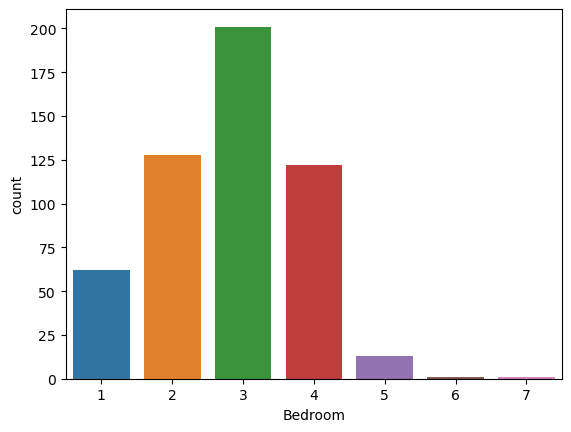

In [17]:
sns.countplot( x = data['Bedroom'])

<AxesSubplot:xlabel='Sqft', ylabel='Price'>

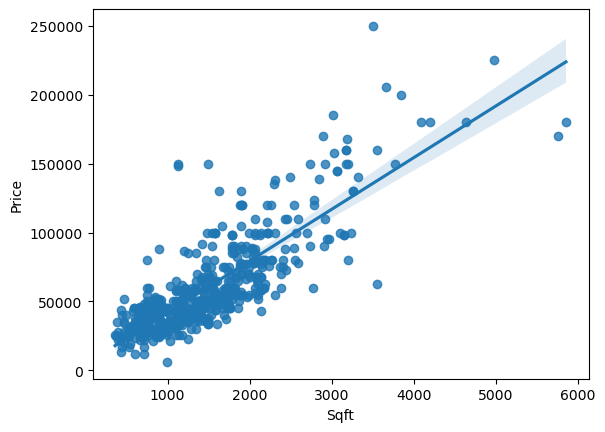

In [18]:
sns.regplot(x = data['Sqft'], y = data['Price'])

<AxesSubplot:xlabel='TotalFloor', ylabel='Count'>

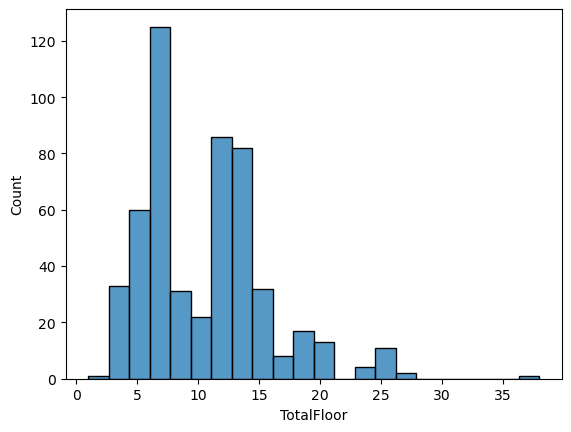

In [19]:
sns.histplot( x = data['TotalFloor'])

<AxesSubplot:xlabel='Price', ylabel='Density'>

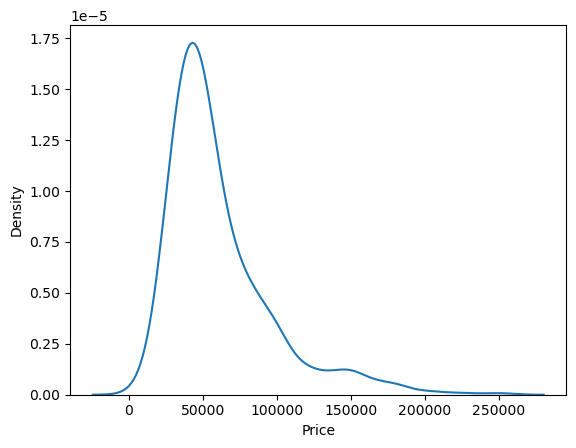

In [20]:
sns.kdeplot(data['Price'])

<AxesSubplot:>

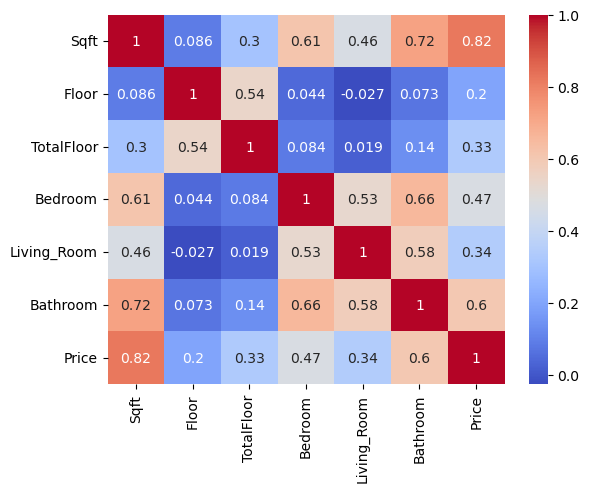

In [21]:
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')

In [22]:
data.dtypes

Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living_Room      int64
Bathroom         int64
Price            int64
dtype: object

In [23]:
X = data.drop('Price', axis = 1)

y = data['Price']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [25]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [27]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [28]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [29]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 355461695.8343526
R-squared: 0.7001058589000657
